In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pyreadstat as ps

In [7]:
df=pd.read_spss(r"C:\Users\User\Downloads\Bangladesh_Pregnancy_Final.sav")

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,CASEID,V000,V001,V012,V013,V020,Division,V025Resi,V106MEdu,V119,...,Fsize,Literacy,Windex,TCEborn,Contraceptive,Maritalstatus,Emarriage,occupation,Media2,Teenage2
0,1 1 3,BD8,1.0,46.0,45-49,Ever married sample,Barishal,Urban,Higher,Yes,...,less than 7 members,literate,Rich,<= 2 children,No,Married,Not married before age 18 years,No,Yes,No
1,1 4 2,BD8,1.0,49.0,45-49,Ever married sample,Barishal,Urban,Secondary,Yes,...,less than 7 members,literate,Rich,3-4 children,No,Married,married at 15-17 years,No,Yes,Yes
2,1 10 2,BD8,1.0,40.0,40-44,Ever married sample,Barishal,Urban,Primary,Yes,...,less than 7 members,literate,Rich,<= 2 children,Yes,Married,Not married before age 18 years,No,Yes,No
3,1 13 2,BD8,1.0,49.0,45-49,Ever married sample,Barishal,Urban,Primary,Yes,...,less than 7 members,illiterate,Rich,3-4 children,No,Married,married before15 years,Yes,Yes,Yes
4,1 18 2,BD8,1.0,35.0,35-39,Ever married sample,Barishal,Urban,No education,Yes,...,less than 7 members,illiterate,Rich,<= 2 children,Yes,Married,married at 15-17 years,Yes,No,Yes


In [10]:
df.dtypes


CASEID             object
V000               object
V001              float64
V012              float64
V013             category
                   ...   
Maritalstatus    category
Emarriage        category
occupation       category
Media2           category
Teenage2         category
Length: 71, dtype: object

In [11]:
df.isnull().sum()

CASEID           0
V000             0
V001             0
V012             0
V013             0
                ..
Maritalstatus    0
Emarriage        0
occupation       0
Media2           0
Teenage2         0
Length: 71, dtype: int64

In [12]:
column_names = list(df.columns)
column_names

['CASEID',
 'V000',
 'V001',
 'V012',
 'V013',
 'V020',
 'Division',
 'V025Resi',
 'V106MEdu',
 'V119',
 'V120',
 'V121',
 'V130',
 'V136',
 'V151Sex',
 'V152',
 'V153',
 'V155',
 'V157',
 'V158',
 'V159',
 'V190',
 'V201',
 'V208',
 'V212',
 'V213',
 'V221',
 'V228',
 'V245',
 'V312',
 'V313',
 'V320',
 'V322',
 'V364',
 'V426',
 'V437',
 'V438',
 'V445',
 'V501',
 'V535',
 'S111A',
 'V511',
 'V525',
 'V602',
 'V701HEdu',
 'V704',
 'V714Working',
 'V716',
 'V730',
 'V743A',
 'M15$1',
 'B4$01',
 'M17$1',
 'M34$1',
 'HW2$1',
 'HW3$1',
 'S904',
 'B8$01',
 'B20$01',
 'S435BH$1',
 'Religion',
 'Fsize',
 'Literacy',
 'Windex',
 'TCEborn',
 'Contraceptive',
 'Maritalstatus',
 'Emarriage',
 'occupation',
 'Media2',
 'Teenage2']

In [13]:
len(column_names)

71

In [14]:

df_new=df[["Teenage2","Division","V025Resi","V106MEdu","V151Sex","V701HEdu","Religion", "Windex", "TCEborn", "Contraceptive","Emarriage", "occupation" ]]

df_new.head()

,Teenage2,Division,V025Resi,V106MEdu,V151Sex,V701HEdu,Religion,Windex,TCEborn,Contraceptive,Emarriage,occupation
0,No,Barishal,Urban,Higher,Female,Higher,Muslim,Rich,<= 2 children,No,Not married before age 18 years,No
1,Yes,Barishal,Urban,Secondary,Male,Secondary,Muslim,Rich,3-4 children,No,married at 15-17 years,No
2,No,Barishal,Urban,Primary,Male,Primary,Muslim,Rich,<= 2 children,Yes,Not married before age 18 years,No
3,Yes,Barishal,Urban,Primary,Male,No education,Muslim,Rich,3-4 children,No,married before15 years,Yes
4,Yes,Barishal,Urban,No education,Male,No education,Non-Muslim,Rich,<= 2 children,Yes,married at 15-17 years,Yes


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
df = df_new.copy()

# Apply label encoding on categorical columns
numeric_columns = df_new.select_dtypes(include=['float64']).columns
categorical_columns = df_new.select_dtypes(include=['category', 'object']).columns

# Impute numeric columns with mean
df_new[numeric_columns] = df_new[numeric_columns].fillna(df_new[numeric_columns].mean())

# Impute categorical columns with mode
for col in categorical_columns:
    df_new[col] = df_new[col].fillna(df_new[col].mode()[0])


In [23]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    if df_new[col].dtype == 'category' or df_new[col].dtype == 'object':
        df_new[col] = label_encoder.fit_transform(df_new[col])

In [26]:
df_new

,Teenage2,Division,V025Resi,V106MEdu,V151Sex,V701HEdu,Religion,Windex,TCEborn,Contraceptive,Emarriage,occupation
0,0,0,1,0,0,0,0,2,1,0,0,0
1,1,0,1,3,1,3,0,2,0,0,1,0
2,0,0,1,2,1,2,0,2,1,1,0,0
3,1,0,1,2,1,1,0,2,0,0,2,1
4,1,0,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17021,1,7,0,2,1,2,0,1,1,0,1,0
17022,0,7,0,1,1,1,0,1,1,0,1,1
17023,1,7,0,2,1,1,0,1,0,1,0,0
17024,1,7,0,2,1,1,0,1,0,1,1,0


In [27]:
X = df_new.drop(columns=['Teenage2'])  # Features
y = df_new['Teenage2']  # Target variable

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

In [29]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [30]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [31]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

In [32]:
# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

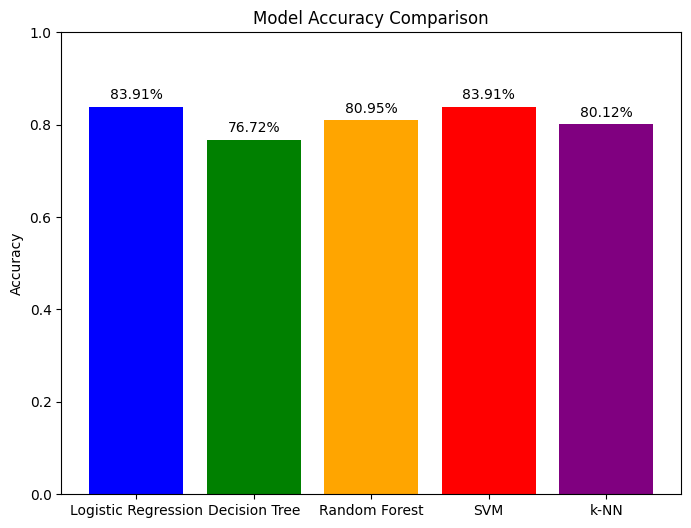

In [35]:
import matplotlib.pyplot as plt

# Model accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']
accuracies = [log_reg_acc, dt_acc, rf_acc, svm_acc, knn_acc]

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add accuracy values as percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval * 100:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit to 1 for accuracy scale

# Show the plot
plt.show()
